In [176]:
import pytesseract
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

# Usa Tessaeract Redes Neuronales?

This paper in the tesseract source provides a deep overview of the technology.

Notably:

Blobs are organized into text lines, and the lines and regions are analyzed for fixed pitch or proportional text.

[...]

Recognition then proceeds as a two-pass process. In the first pass, an attempt is made to recognize each word in turn. Each word that is satisfactory is passed to an adaptive classifier as training data. The adaptive classifier then gets a chance to more accurately recognize text lower down the page.

[...]

Once the text lines have been found, the baselines are fitted more precisely using a quadratic spline.

[...]

The baselines are fitted by partitioning the blobs into groups with a reasonably continuous displacement for the original straight baseline. A quadratic spline is fitted to the most populous partition, (assumed to be the baseline) by a least squares fit.

Por el contexto es razonable pensar que si usan redes neuronales en la parte que menciona un entrenamiento

# Prueba parte de atras

Prueba con parte de atras - a color 

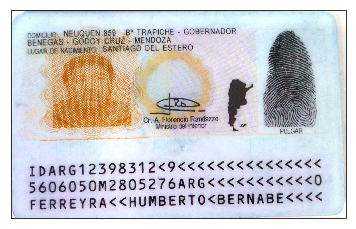

TRAPICHE - GOBERNADOR

    

IDARG12398312<9<<<<<<<<<<<<<<<

5606050M2805276ARG<<<<<<<<<<<0
FERREYRA<<HUMBERTO<BERNABE<<<<


In [9]:
img = cv2.imread('abc.jpg')
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([]) 
plt.show()
print(pytesseract.image_to_string(img))

Prueba con parte de atras - escala de grises y filtrado de ruido casero

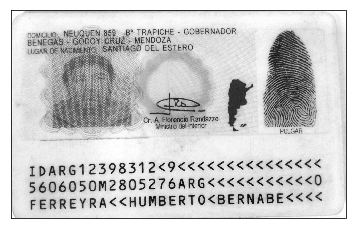

In [25]:
img_g= cv2.imread('abc.jpg',0)
plt.imshow(img_g, cmap = 'gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

(807, 1299)


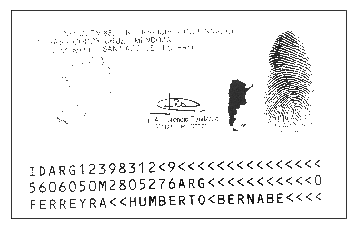

In [31]:
print(img_g.shape)
num_dni_1_rs=img_g
for i in range(0,807):
    for j in range(0,1299):
        if(num_dni_1_rs[i][j]>75):
            num_dni_1_rs[i][j]=255
plt.imshow(num_dni_1_rs, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [32]:
print(pytesseract.image_to_string(num_dni_1_rs))

8‘ THAMCHE , (suauaqngw

 

@.

x. V ‘ .
' ~,. ‘ u A Fbvencno Raudazzo
"ﬁnustrs dd menor z,

 

IDARG12398312<9<<<<<<<<<<<<<<<

560605OM2805276ARG<<<<<<<<<<<O
FERREYRA<<HUMBERTO<BERNABE<<<<


# Prueba parte de adelante

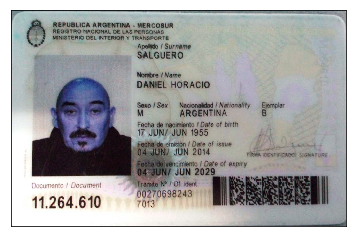

b—m— mm' cwm‘ﬁm ‘.
: IE'WLICA ARGENTINA - MERCOIUR
' ">5 REGISTRO MGWL 0! us PERSONAS
MTERD DEL INTERIM V NAMFORTI

Apoﬂo ISurnm
SALGUERO

W I Name
DANEL HORACUO

 
     
  
 
 
 
 
   
 
 

Sun I Sex M I Nationality Wr
M ARGENTINA B

Foch: 6. mm (Data of mm:
17 JUN! JUN 1955

enisanDato ofvssue ., ¢ I. .v.. .
f .-—. ‘ 3' , JUN 20“ KM ioemsm swuﬁ

' ' IDole ofexplr
JUN °2029 '

11.264.610 gg1370698243


In [33]:
img2 = cv2.imread('abc2.jpg')
plt.imshow(img2, cmap = 'gray')
plt.xticks([]), plt.yticks([]) 
plt.show()
print(pytesseract.image_to_string(img2))

Prueba con parte de adelante - escala de grises y filtrado de ruido casero

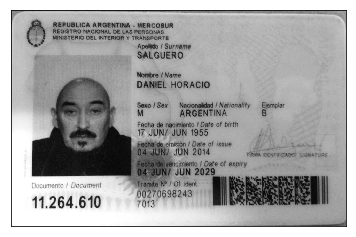

RIPUILICA ARGENTINA - MERCOIUR
,3 REOISTRO NACIONAL DE LAS PERSONAS
,\ HMS‘I'ERDO DEL INTERIM V YRANSPOIYI

Apollo ISurnm
SALGUERO

W [Nome
DAWEL HORACIO

  
    
  
 
 
 
 
     
 

8. IS WINWOMM W:
M° " ARGENTINA ' a

Fm d0 mm [Date of 0:th

17 JUN/ JUN 1955

_ emisbn/Due of Issue .. 0. ., y, -0. .
ﬁx. JUN 20“ ‘4?“le whatnot? SiGRI’JCi

MO I Date of expuy
JUN 2029

00270698243
7013

 
   

11.264.610


In [10]:
img_g2= cv2.imread('abc2.jpg',0)
plt.imshow(img_g2, cmap = 'gray')
plt.xticks([]), plt.yticks([]) 
plt.show()
print(pytesseract.image_to_string(img_g2))

(836, 1297)


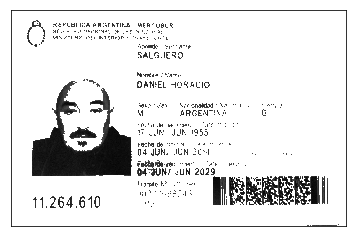

In [11]:
print(img_g2.shape)
num_dni_1_rs=img_g2
for i in range(0,836):
    for j in range(0,1297):
        if(num_dni_1_rs[i][j]>75):
            num_dni_1_rs[i][j]=255
plt.imshow(num_dni_1_rs, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [275]:
print(pytesseract.image_to_string(num_dni_1_rs,config="tessedit_char_whitelist=0123456789"))

REPUBLICA ARGENTINA MERL OSUR
REG IS‘RD NAL K‘NAL m mg m ‘e ~~.A:
I: VI‘J'SHRK‘ (‘EL IN‘IERIOR‘ YHANSVX'G F.
r Apehdo SU’M’N'
SALGUERO

Nombne lName
DANIEL HORACIO

Sam JSm Na\1»0naidad"\af‘~"'3 ‘. t r J
M ARGENTlNA E

‘eoha d9 nacxmrents ‘ 3.9:» 1‘ ' '

17 JUN” JUN 1955
rOChadeo'iusvov .‘am “ $52.9

04 JUN: JUN 2014 _,,.

Fm“ VOM wank [.19 s m
04‘3”?“ JUN 2029

‘ Tramﬂe NB 0' “P” I‘“ §mﬂi‘
0'13‘0698,‘43
11.264.610


In [334]:
img_l= cv2.imread('textdni.jpg',0)

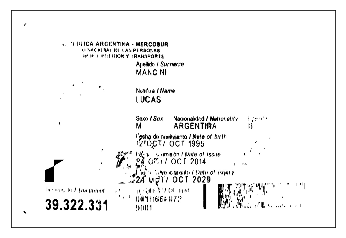

In [330]:
img_l = cv2.resize(img_l, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
plt.imshow(img_l, cmap = 'gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [331]:
cv2.threshold(img_l,127,255,cv2.THRESH_BINARY)
kernel = np.ones((1, 1), np.uint8)
img_l = cv2.dilate(img_l, kernel, iterations=1)
img_l = cv2.erode(img_l, kernel, iterations=1)
#plt.imshow(img_l, cmap = 'gray')
#plt.xticks([]), plt.yticks([]) 
#plt.show()

In [340]:
texto_l=pytesseract.image_to_string(img_l, lang=None, boxes=None, config='-psm=7')
texto_l

TesseractError: (1, 'Error opening data file \\Program Files (x86)\\Tesseract-OCR\\tessdata/letsgodigital.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to the parent directory of your "tessdata" directory. Failed loading language \'letsgodigital\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [301]:
extraer_dni(texto_l)

['9', '9', '.', '9', '9', '9', '.', '9', '9', '9']

# Algoritmos para extraer Numero de Dni del texto

texto extraido

In [13]:
a=pytesseract.image_to_string(num_dni_1_rs)

In [14]:
a

'REPUBLICA ARGENTINA MERL OSUR\nREG IS‘RD NAL K‘NAL m mg m ‘e ~~.A:\nI: VI‘J\'SHRK‘ (‘EL IN‘IERIOR‘ YHANSVX\'G F.\nr Apehdo SU’M’N\'\nSALGUERO\n\nNombne lName\nDANIEL HORACIO\n\nSam JSm Na\\1»0naidad"\\af‘~"\'3 ‘. t r J\nM ARGENTlNA E\n\n‘eoha d9 nacxmrents ‘ 3.9:» 1‘ \' \'\n\n17 JUN” JUN 1955\nrOChadeo\'iusvov .‘am “ $52.9\n\n04 JUN: JUN 2014 _,,.\n\nFm“ VOM wank [.19 s m\n04‘3”?“ JUN 2029\n\n‘ Tramﬂe NB 0\' “P” I‘“ §mﬂi‘\n0\'13‘0698,‘43\n11.264.610'

Funciones

In [140]:
def extraer_dni(texto):
    lista_aux=[]
    for i in texto:
        if (i.isnumeric()==True) or (es_punto(i) == True):
            if (len(lista_aux)==0): #si la lista ESTA vacia
                if(i.isnumeric()==True):lista_aux.append(i)
            else:
                if(cumple_patron(lista_aux)=="no"):
                    lista_aux=[]
                if(cumple_patron(lista_aux)=="si"):
                    lista_aux.append(i)
                if(cumple_patron(lista_aux)=="terminado"):
                    return lista_aux
        else:
            lista_aux=[]

            
    lista_aux=[]
    return lista_aux


In [95]:
def cumple_patron(lista):
    aux=0
    if(len(lista)==0):return "no" #caso de lista vacia
    while(aux < len(lista)):
        if(aux==0) and (lista[aux].isnumeric()==False):
                return "no"
        if(aux==1) and (lista[aux].isnumeric()==False):
                return "no"
        if(aux==2) and (es_punto(lista[aux]) == False):
                return "no"
        if(aux==3) and (lista[aux].isnumeric()==False):
                return "no"
        if(aux==4) and (lista[aux].isnumeric()==False):
                return "no"
        if(aux==5) and (lista[aux].isnumeric()==False):
                return "no"
        if(aux==6) and (es_punto(lista[aux]) == False):
                return "no"
        if(aux==7) and (lista[aux].isnumeric()==False):
                return "no"
        if(aux==8) and (lista[aux].isnumeric()==False):
                return "no"
        if(aux==9) and (lista[aux].isnumeric()==False):
                return "no"
        aux=aux+1
        
    if(aux==10):
        return "terminado"
    return "si"
        
        
    

In [23]:
def es_punto(l):
    if(l == '.'):
        return True
    else:
        return False

Pruebas:

In [300]:
#prueba final
extraer_dni(a)

['1', '1', '.', '2', '6', '4', '.', '6', '1', '0']

In [85]:
#prueba de la funcion "cumple Padron"
fg=[]
print(cumple_padron(fg))
fg.append(1)
cumple_padron(fg)

no


'si'

In [72]:
fg2=[]
fg2.append("1")
fg2.append("1")
fg2.append(".")
fg2.append("4")
fg2.append("1")
fg2.append("1")
fg2.append(".")
fg2.append("1")
for i in range(8):
    print(fg2[i].isnumeric())
#cumple_padron(fg2)
#conclusion --> el cumple padron anda bien

True
True
False
True
True
True
False
True


In [141]:
#Prueba con string
s=str("er11.456.7673kjcsbfi343s.q")
extraer_dni(s)

['1', '1', '.', '4', '5', '6', '.', '7', '6', '7']

In [142]:
#obs, a arreglar---> caso que empieza con . y despues numeros
s=str("et.56.456.767kjcsbfi343s.q")
extraer_dni(s)
#listo

['5', '6', '.', '4', '5', '6', '.', '7', '6', '7']

In [147]:
#obs, a arreglar---> caso que empieza con 3 numeros 
s=str("et456.456.767kjcsbfi343s.q")
extraer_dni(s)
#falta arreglarlo

[]

# Pruebas directamente con PDFs

In [168]:
from __future__ import print_function
from wand.image import Image

with Image(filename='pikachu.png') as img:
    print('width =', img.width)
    print('height =', img.height)

ImportError: MagickWand shared library not found.
You probably had not installed ImageMagick library.
Try to install:
  http://docs.wand-py.org/en/latest/guide/install.html#install-imagemagick-on-windows